In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# 1.Data Preparation and Exploratory Data Analysis (EDA)

In [ ]:
# Load the dataset from a CSV file
data = pd.read_csv('ToyotaCorolla.csv')


In [ ]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
# Check for missing values

print(data.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


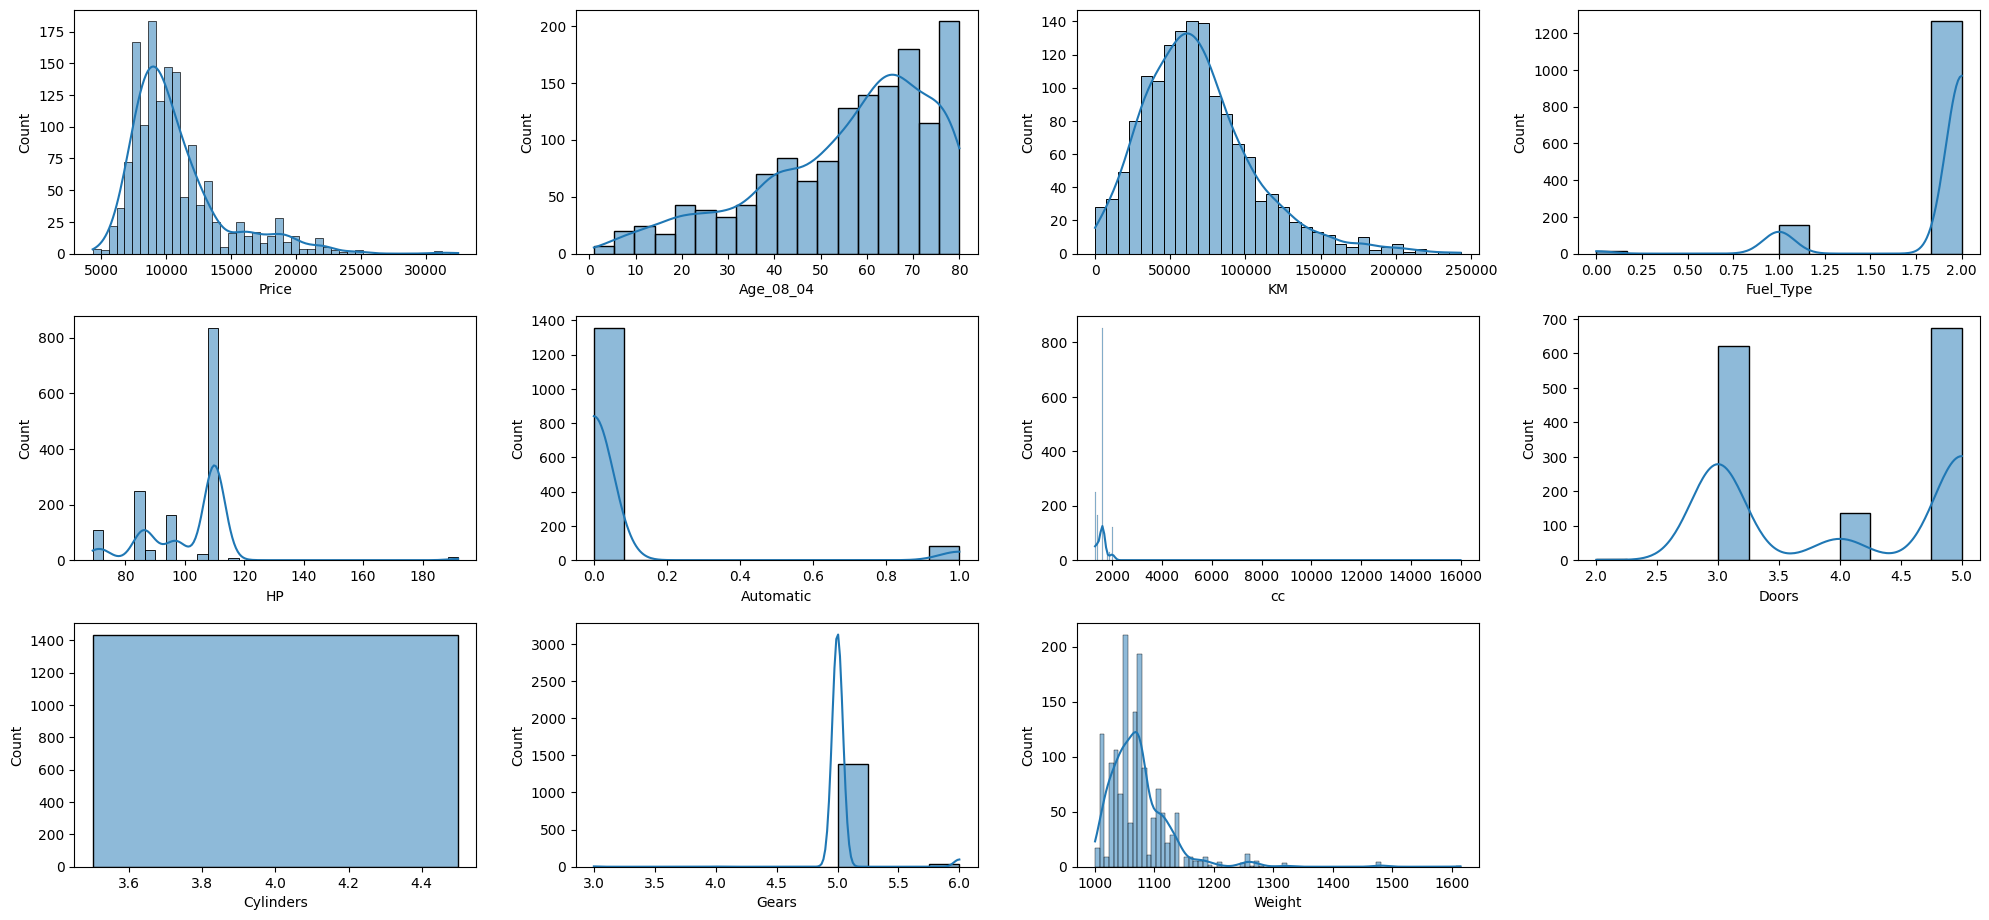

In [ ]:
# Visualize the distribution of variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data[column], kde=True)
plt.tight_layout()
plt.show()


# enumerate --> Python function that gives you both the index (i) and the value (column) of each item in a sequence (in this case, data.columns)
# We start the index i at 1 instead of the default 0
# plt.tight_layout(): This line automatically adjusts the spacing between subplots to prevent them from overlapping. It makes the plot look neater.

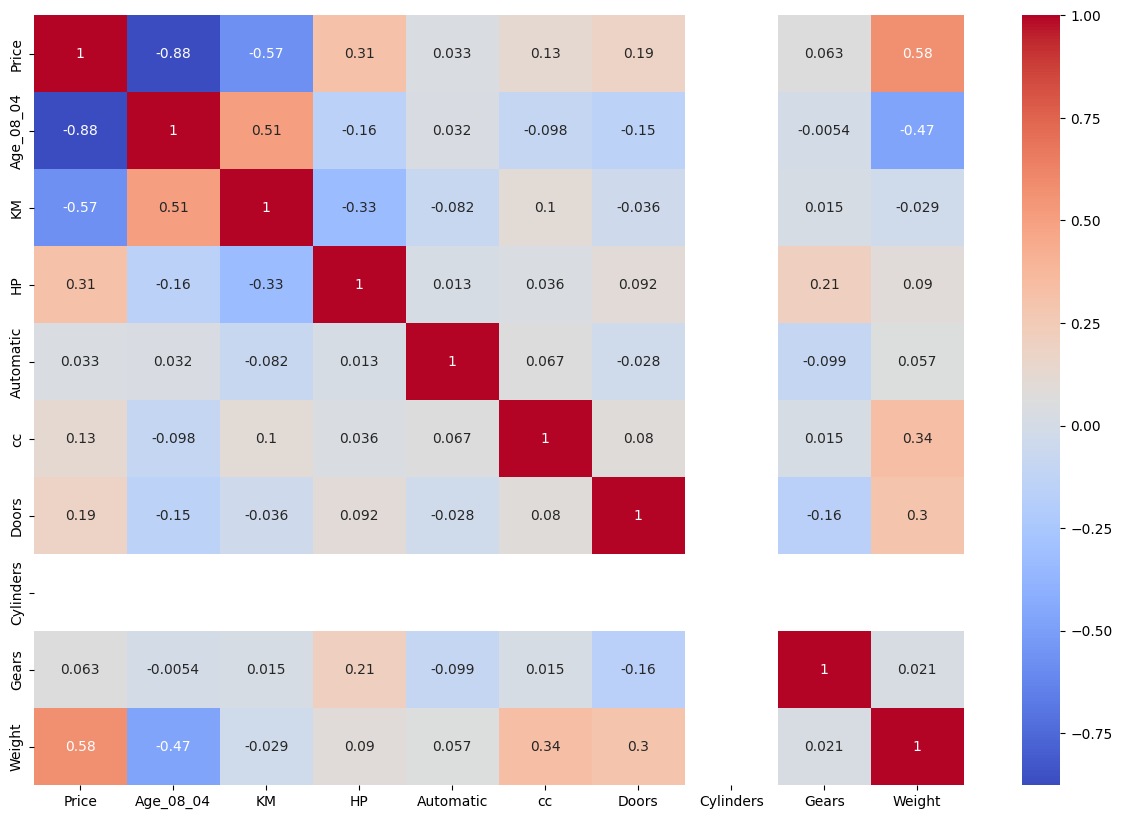

In [ ]:
# Visualize correlations using a heatmap
plt.figure(figsize=(15, 10))

# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)            #Select only numerical features
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# annot=True --> instructs the function to display the correlation values within each cell of the heatmap, making it easier to interpret.

### Preprocess the Data

In [ ]:
data['Fuel_Type'].value_counts()

# Three variablesin Fuel_Type.They are:

,count
Fuel_Type,
Petrol,1264
Diesel,155
CNG,17


In [ ]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])


In [ ]:
data['Fuel_Type'].value_counts()

,count
Fuel_Type,
2,1264
1,155
0,17


In [ ]:
# Handle missing values if needed (example: fill with mean)
data = data.fillna(data.mean())

# Feature and target variable
X = data.drop('Price', axis=1)
y = data['Price']                 # Only price column

# 2.Split the Dataset

In [ ]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3.Build Multiple Linear Regression Models

In [ ]:
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)



In [ ]:
# Model 2: Using a subset of features (e.g., Age, KM, HP)
X_train_subset = X_train[['Age_08_04', 'KM', 'HP']]
X_test_subset = X_test[['Age_08_04', 'KM', 'HP']]
model2 = LinearRegression()
model2.fit(X_train_subset, y_train)
y_pred2 = model2.predict(X_test_subset)



In [ ]:
# Model 3: Using a different subset of features (e.g., Age, KM, Weight)
X_train_subset2 = X_train[['Age_08_04', 'KM', 'Weight']]
X_test_subset2 = X_test[['Age_08_04', 'KM', 'Weight']]
model3 = LinearRegression()
model3.fit(X_train_subset2, y_train)
y_pred3 = model3.predict(X_test_subset2)


### Interpret Coefficients

In [ ]:
# Coefficients of Model 1
coefficients = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


           Coefficient
Age_08_04  -121.436240
KM           -0.016936
Fuel_Type   862.056431
HP           20.658283
Automatic   245.196891
cc           -0.073515
Doors       -36.279648
Cylinders     0.000000
Gears       530.282040
Weight       23.510643


# 4. Evaluate Model Performance

In [ ]:
# Evaluation metrics for Model 1
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f'Model 1 - MSE: {mse1}, R2: {r2_1}')



Model 1 - MSE: 2096851.1400177048, R2: 0.8428476112018002


In [ ]:
# Evaluation metrics for Model 2
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print(f'Model 2 - MSE: {mse2}, R2: {r2_2}')



Model 2 - MSE: 2530780.7798339287, R2: 0.8103259513824549


In [ ]:
# Evaluation metrics for Model 3
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f'Model 3 - MSE: {mse3}, R2: {r2_3}')


Model 3 - MSE: 2234953.0617259303, R2: 0.8324973071292439


# 5.Apply Lasso and Ridge Methods

###  Lasso Regression

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso - MSE: {mse_lasso}, R2: {r2_lasso}')



Lasso - MSE: 2096722.1822062018, R2: 0.8428572761836126


###  Ridge Regression

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge - MSE: {mse_ridge}, R2: {r2_ridge}')


Ridge - MSE: 2096694.7223460232, R2: 0.8428593342136468


# Interview Questions:


1.What is Normalization & Standardization and how is it helpful?


Normalization:

Definition: Scales data to a range of [0,1] or [-1, 1].

Purpose: Ensures all features contribute equally by putting them on the same scale.

Standardization:

Definition: Scales data to have a mean of 0 and a standard deviation of 1.

Purpose: Makes data easier to compare and useful for algorithms assuming normally distributed data.

Helpful Because:

Improves model performance and training stability.

Ensures equal feature contribution.

Essential for distance-based algorithms.



2.What techniques can be used to address multicollinearity in multiple linear regression?





Remove Highly Correlated Predictors: Drop one of the highly correlated variables.

Principal Component Analysis (PCA): Transform predictors into uncorrelated components.

Ridge Regression: Adds a penalty term to reduce multicollinearity impact.

Variance Inflation Factor (VIF): Calculate VIF and remove predictors with high VIF.

Lasso Regression: Adds a penalty that can shrink coefficients to zero, performing variable selection.